<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_4_1_%26_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 & 4.2 Spectral Graph Bipartitioning



---



Key Concepts:


*   Graph and Graph Modeling

#### Set up

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import eigh



---



### Introduction & Spectral Graph Bipartitioning

Networks can be modeled as graphs, where nodes represent entities and edges represent relationships. Social graphs, with millions of nodes and billions of edges, reflect these interactions and relationships.

Networks often exhibit community structures with clusters, which are groups of nodes more connected within the group than outside. Detecting these communities is essential in applications like friend recommendations and link predictions. Spatial distances describe network connectivity among communities, aiding in capturing key characteristics within datasets.

<br><br>
**Graph Models**

A graph $ G $ consists of a set of nodes $ V = \{v_1, v_2, \dots, v_n\} $ and edges $ E = \{e_1, e_2, \dots, e_m\} $. An edge $ e(v_1, v_2) $ connects nodes $ v_1 $ and $ v_2 $. Graphs can be:
- **Directed**: Edges have direction, $ e(v_1, v_2) \neq e(v_2, v_1) $
- **Undirected**: Edges are bidirectional
- **Mixed**: Both directed and undirected edges exist

A sequence of distinct edges forms a path, with closed paths called cycles. The **shortest path** is the minimum number of edges connecting two nodes.

The **degree** of a node is the number of edges connected to it:
- **In-degree**: Edges toward the node
- **Out-degree**: Edges away from the node

<br><br>
**Laplacian Matrix**

For a graph with $ n $ nodes, the adjacency matrix $ A $ is an $ n \times n $ matrix, where $ A_{ij} = 1 $ indicates a connection between nodes $ v_i $ and $ v_j $, and $ A_{ij} = 0 $ indicates no connection.

The **Laplacian matrix** $ L $ is defined as:
$$
L_{ij} = \begin{cases}
\sum_k E_{ik}, & i = j, \\
-E_{ij}, & i \neq j \text{ and } v_i \text{ is adjacent to } v_j, \\
0, & \text{otherwise}.
\end{cases}
$$
Properties of the Laplacian matrix $ L $:
1. $ L = D - A $, where $ D $ is the degree matrix.
2. $ L $ is symmetric and positive semi-definite.
3. The smallest eigenvalue of $ L $ is $ 0 $, with the corresponding eigenvector $ e = [1, 1, \dots, 1]^T $.

<br><br>
**Spectral Graph Bipartitioning**

Graph partitioning aims to divide a graph such that the **cut** (total edges between two disjoint sets of nodes) is minimized. For a weighted graph $ G = (V, E) $, given a bipartition into sets $ V_1 $ and $ V_2 $, the cut is defined as:
$$
\text{cut}(V_1, V_2) = \sum_{i \in V_1, j \in V_2} M_{ij}.
$$

The **partition vector** $ p $ is defined as:
$$
p_i = \begin{cases}
+1, & i \in V_1, \\
-1, & i \in V_2.
\end{cases}
$$

The cut can be characterized by the **Rayleigh Quotient**:
$$
\frac{p^T L p}{p^T p} = \frac{1}{n} \cdot 4 \, \text{cut}(V_1, V_2).
$$

An objective function to balance cuts is defined as:
$$
Q(V_1, V_2) = \frac{\text{cut}(V_1, V_2)}{\text{weight}(V_1)} + \frac{\text{cut}(V_1, V_2)}{\text{weight}(V_2)}.
$$

**Theorem 4.2.2**
For the partition vector $ q $:
$$
q_i = \begin{cases}
+\sqrt{\frac{\nu_2}{\nu_1}}, & i \in V_1, \\
-\sqrt{\frac{\nu_1}{\nu_2}}, & i \in V_2,
\end{cases}
$$
where $ \nu_1 $ and $ \nu_2 $ are the weights of $ V_1 $ and $ V_2 $, respectively. The problem:
$$
\min_{q \neq 0} \frac{q^T L q}{q^T W q}, \quad \text{subject to } q^T W e = 0,
$$
is solved when $ q $ is the eigenvector corresponding to the second smallest eigenvalue $ \lambda_2 $ of the generalized eigenvalue problem $ L x = \lambda W x $.


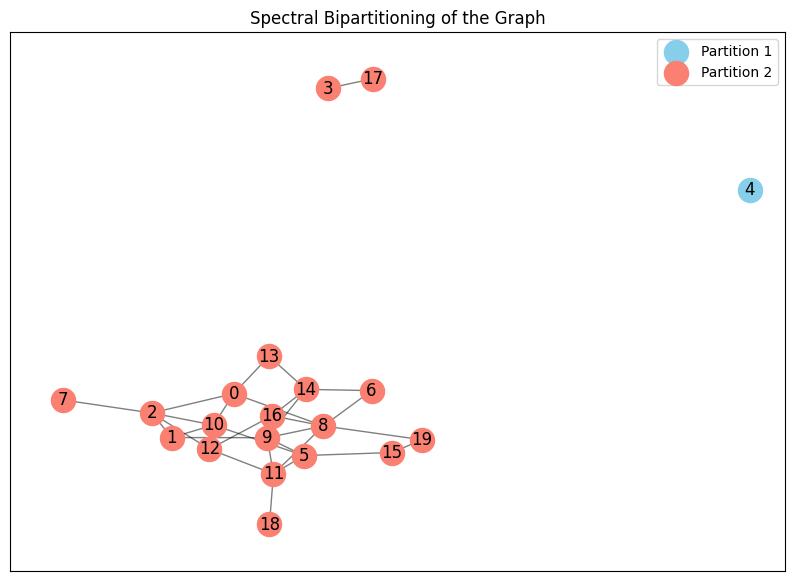

In [1]:
# Random graph and Laplacian matrix
G = nx.erdos_renyi_graph(n=20, p=0.15, seed=42)
pos = nx.spring_layout(G, seed=42)
L = nx.laplacian_matrix(G).toarray()

# Eigenvalues and eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = eigh(L)
fiedler_vector = eigenvectors[:, 1]

# Graph with partitions
partition_1 = [i for i, val in enumerate(fiedler_vector) if val > 0]
partition_2 = [i for i, val in enumerate(fiedler_vector) if val <= 0]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, nodelist=partition_1, node_color="skyblue", label="Partition 1", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=partition_2, node_color="salmon", label="Partition 2", node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.title("Spectral Bipartitioning of the Graph")
plt.legend()
plt.show()
